# Regularization
Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well.

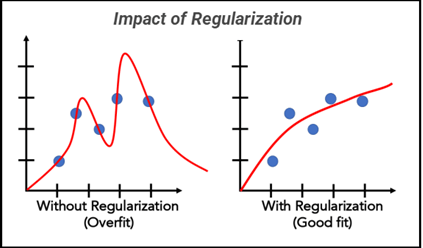

## **Mathematical Formulation**
For a linear regression model:

- **L1 Regularization (Lasso) Loss Function:**
  
  $$ L = \sum (y_i - \hat{y}_i)^2 + \lambda \sum |w_j| $$

- **L2 Regularization (Ridge) Loss Function:**
  
  $$ L = \sum (y_i - \hat{y}_i)^2 + \lambda \sum w_j^2 $$

where:
- $( \lambda )$ is the regularization parameter (higher values mean more regularization).
- $( w_j )$ are the model coefficients.






#1. Generating Sample Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Create synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature: Random numbers from 0 to 10
y = 2 * X.squeeze() + np.random.randn(100) * 2  # Linear function with noise

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 2. L1 Regularization (Lasso Regression)

In [ ]:
# Apply Lasso Regression
lasso = Lasso(alpha=1.0)  # Regularization strength
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test)

# Evaluate
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Coefficients:", lasso.coef_)

Lasso Regression MSE: 2.6336756998445647
Lasso Coefficients: [1.80182856]


# Practice Questions for Lasso Regression:
 1. Modify the Lasso regression implementation to include cross-validation and find the optimal alpha value.
 2. Implement a function to visualize the effect of different alpha values on the sparsity of coefficients.
 3. Implement a function to evaluate and compare the performance of Lasso and OLS using different metrics like R^2 and Mean Absolute Error.

# 3. L2 Regularization (Ridge Regression)

In [ ]:
# Apply Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)

# Evaluate
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Coefficients:", ridge.coef_)


Ridge Regression MSE: 2.6120375137100647
Ridge Coefficients: [1.9169044]


# Practice Questions for Ridge Regression:
1. Modify the Ridge regression implementation to perform hyperparameter tuning using GridSearchCV.
2. Compare Ridge regression with Lasso regression on a dataset with correlated features.
3. Implement a custom Ridge regression using gradient descent.

# 4. Visualizing Lasso vs Ridge

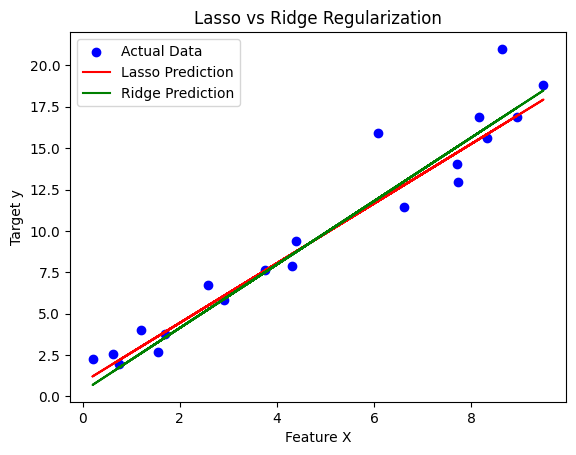

In [ ]:
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred_lasso, color="red", label="Lasso Prediction")
plt.plot(X_test, y_pred_ridge, color="green", label="Ridge Prediction")
plt.legend()
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Lasso vs Ridge Regularization")
plt.show()

-----------

#Dropout

Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel. As mentioned, it is preferrably used when training a large neural network.

In [ ]:
from IPython.display import Image
Image(url="https://miro.medium.com/max/1200/1*iWQzxhVlvadk6VAJjsgXgg.png", width=800, height=500)

*By dropping a unit out, we mean temporarily removing it from the network, along with all its incoming and outgoing connections*

Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.
This conceptualization suggests that perhaps dropout breaks-up situations where network layers co-adapt to correct mistakes from prior layers, in turn making the model more robust.

## **1. Why Dropout?**
- Neural networks with **too many parameters** can memorize training data.
- Dropout **randomly deactivates neurons** in each training step, forcing the network to learn more robust features.
- Helps in **generalization** by reducing reliance on specific neurons.


#Generating Sample Data

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np

# Create synthetic dataset
np.random.seed(42)
X = np.random.rand(1000, 10).astype(np.float32)  # 1000 samples, 10 features
y = (X.sum(axis=1) > 5).astype(np.float32).reshape(-1, 1)  # Binary classification

# Convert to PyTorch tensors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = torch.tensor(X_train), torch.tensor(X_test)
y_train, y_test = torch.tensor(y_train), torch.tensor(y_test)

# Neural Network Without Dropout

In [ ]:
class ModelWithoutDropout(nn.Module):
    def __init__(self):
        super(ModelWithoutDropout, self).__init__()
        self.fc1 = nn.Linear(10, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model, loss, optimizer
model_no_dropout = ModelWithoutDropout()
criterion = nn.BCELoss()
optimizer = optim.Adam(model_no_dropout.parameters(), lr=0.001)

# Training loop
def train_model(model, X_train, y_train, epochs=50):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

print("Training without Dropout...")
train_model(model_no_dropout, X_train, y_train)


Training without Dropout...
Epoch [1/50], Loss: 0.6950
Epoch [11/50], Loss: 0.6860
Epoch [21/50], Loss: 0.6765
Epoch [31/50], Loss: 0.6644
Epoch [41/50], Loss: 0.6476


# Neural Network With Dropout

In [ ]:
class ModelWithDropout(nn.Module):
    def __init__(self):
        super(ModelWithDropout, self).__init__()
        self.fc1 = nn.Linear(10, 64)  # No dropout here
        self.fc2 = nn.Linear(64, 32)
        self.dropout = nn.Dropout(0.2)  # Dropout only after second layer
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))  # First layer without dropout
        x = self.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout here
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model, loss, optimizer
model_with_dropout = ModelWithDropout()
optimizer = optim.Adam(model_with_dropout.parameters(), lr=0.001)

print("Training with Dropout...")
train_model(model_with_dropout, X_train, y_train)


Training with Dropout...
Epoch [1/50], Loss: 0.6919
Epoch [11/50], Loss: 0.6814
Epoch [21/50], Loss: 0.6715
Epoch [31/50], Loss: 0.6603
Epoch [41/50], Loss: 0.6409


# Comparing Performance

In [ ]:
# Evaluate models
def evaluate_model(model, X_test, y_test):
    with torch.no_grad():
        outputs = model(X_test)
        predicted = (outputs > 0.5).float()
        accuracy = (predicted == y_test).float().mean()
        return accuracy.item()

acc_no_dropout = evaluate_model(model_no_dropout, X_test, y_test)
acc_with_dropout = evaluate_model(model_with_dropout, X_test, y_test)

print(f"Test Accuracy (No Dropout): {acc_no_dropout:.4f}")
print(f"Test Accuracy (With Dropout): {acc_with_dropout:.4f}")


Test Accuracy (No Dropout): 0.7300
Test Accuracy (With Dropout): 0.8050


# Practice Questions for Dropout:
1. Modify the dropout rate and analyze how it impacts model training and validation accuracy.
2. Implement a function that dynamically adjusts the dropout rate based on training epochs.
3. Compare dropout with L2 regularization in terms of overfitting prevention.


------

# Batch Normalization
Batch Normalization (BatchNorm) is a regularization technique that helps stabilize and speed up training in deep neural networks by **normalizing activations** across a mini-batch.
##Why Batch Normalization?
- **Neural networks can suffer from internal covariate shift** (changes in input distribution across layers during training).
- **Batch Normalization reduces this shift** by normalizing activations across each mini-batch.
- **Leads to faster convergence, higher stability, and improved accuracy.**
---



## **3. Implementing Batch Normalization in Python**
### **3.1 Generating Sample Data**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np

# Create synthetic dataset

In [ ]:
np.random.seed(42)
X = np.random.rand(1000, 10).astype(np.float32)  # 1000 samples, 10 features
y = (X.sum(axis=1) > 5).astype(np.float32).reshape(-1, 1)  # Binary classification

# Convert to PyTorch tensors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = torch.tensor(X_train), torch.tensor(X_test)
y_train, y_test = torch.tensor(y_train), torch.tensor(y_test)

# Neural Network Without Batch Normalization

In [ ]:
class ModelWithoutBN(nn.Module):
    def __init__(self):
        super(ModelWithoutBN, self).__init__()
        self.fc1 = nn.Linear(10, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model, loss, optimizer
model_no_bn = ModelWithoutBN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model_no_bn.parameters(), lr=0.001)

# Training loop
def train_model(model, X_train, y_train, epochs=50):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

print("Training without BatchNorm...")
train_model(model_no_bn, X_train, y_train)


Training without BatchNorm...
Epoch [1/50], Loss: 0.6908
Epoch [11/50], Loss: 0.6803
Epoch [21/50], Loss: 0.6663
Epoch [31/50], Loss: 0.6472
Epoch [41/50], Loss: 0.6200


# Neural Network With Batch Normalization

In [ ]:
class ModelWithBN(nn.Module):
    def __init__(self):
        super(ModelWithBN, self).__init__()
        self.fc1 = nn.Linear(10, 64)
        self.bn1 = nn.BatchNorm1d(64)  # Batch Normalization
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)  # Batch Normalization
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model, loss, optimizer
model_with_bn = ModelWithBN()
optimizer = optim.Adam(model_with_bn.parameters(), lr=0.001)

print("Training with BatchNorm...")
train_model(model_with_bn, X_train, y_train)


Training with BatchNorm...
Epoch [1/50], Loss: 0.6718
Epoch [11/50], Loss: 0.5120
Epoch [21/50], Loss: 0.4086
Epoch [31/50], Loss: 0.3408
Epoch [41/50], Loss: 0.2946


#Comparing Performance

In [ ]:
# Evaluate both models
def evaluate_model(model, X_test, y_test):
    with torch.no_grad():
        outputs = model(X_test)
        predicted = (outputs > 0.5).float()
        accuracy = (predicted == y_test).float().mean()
        return accuracy.item()

acc_no_bn = evaluate_model(model_no_bn, X_test, y_test)
acc_with_bn = evaluate_model(model_with_bn, X_test, y_test)

print(f"Test Accuracy (No BatchNorm): {acc_no_bn:.4f}")
print(f"Test Accuracy (With BatchNorm): {acc_with_bn:.4f}")

Test Accuracy (No BatchNorm): 0.8250
Test Accuracy (With BatchNorm): 0.9300


# Practice Questions for Batch Normalization:
1. Compare a model with and without batch normalization and analyze the effect on convergence speed.
2. Modify the batch size and observe how it impacts the effectiveness of batch normalization.
3. Implement a custom batch normalization function using PyTorch.

# Activation Functions

# Why use an activation function?
Activation functions are one of the most important choices to be made for the architecture of a neural network. Without an activation function, neural networks can essentially only act as a linear regression model. Since most datasets are non-linear to at least some degree, using an activation function facilitates the modeling of more complex relationships between variables, allowing a neural network to truly be a universal function approximator.

# How does an activation function work?
For each hidden layer node, the input nodes are multiplied by their current weights and then summed. As an example, consider a hidden layer node with three input nodes that might be modeled by:

$$
  n = (w_1 x_1) + (w_2 x_2) + (w_3 x_3)
$$

The activation function takes this linear input and translates it into a nonlinear output. For example, a logistic activation function is given by:
$$
  f(x) = \frac{1}{1\ –\ e^{-n}}
$$


In [ ]:
## Standard libraries
import os
import json
import math
import numpy as np

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

<ipython-input-1-a7f785b7f466>:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [ ]:
# Path to the folder where the datasets are/should be downloaded (e.g. MNIST)
DATASET_PATH = "../data"
# Path to the folder where the pretrained models are saved
CHECKPOINT_PATH = "../saved_models/tutorial3"

# Function for setting the seed
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available(): # GPU operation have separate seed
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
set_seed(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Fetching the device that will be used throughout this notebook
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0")
print("Using device", device)

Using device cpu


In [ ]:
import urllib.request
from urllib.error import HTTPError
# Github URL where saved models are stored for this tutorial
base_url = "https://raw.githubusercontent.com/phlippe/saved_models/main/tutorial3/"
# Files to download
pretrained_files = ["FashionMNIST_elu.config", "FashionMNIST_elu.tar",
                    "FashionMNIST_leakyrelu.config", "FashionMNIST_leakyrelu.tar",
                    "FashionMNIST_relu.config", "FashionMNIST_relu.tar",
                    "FashionMNIST_sigmoid.config", "FashionMNIST_sigmoid.tar",
                    "FashionMNIST_swish.config", "FashionMNIST_swish.tar",
                    "FashionMNIST_tanh.config", "FashionMNIST_tanh.tar"]
# Create checkpoint path if it doesn't exist yet
os.makedirs(CHECKPOINT_PATH, exist_ok=True)

# For each file, check whether it already exists. If not, try downloading it.
for file_name in pretrained_files:
    file_path = os.path.join(CHECKPOINT_PATH, file_name)
    if not os.path.isfile(file_path):
        file_url = base_url + file_name
        print(f"Downloading {file_url}...")
        try:
            urllib.request.urlretrieve(file_url, file_path)
        except HTTPError as e:
            print("Something went wrong. Please try to download the file from the GDrive folder, or contact the author with the full output including the following error:\n", e)

# Common activation functions

In [ ]:
class ActivationFunction(nn.Module):

    def __init__(self):
        super().__init__()
        self.name = self.__class__.__name__
        self.config = {"name": self.name}

# Logistic (sigmoid)
The logistic (or sigmoid) activation function, mentioned above, looks like:

Text(0, 0.5, 'Output')

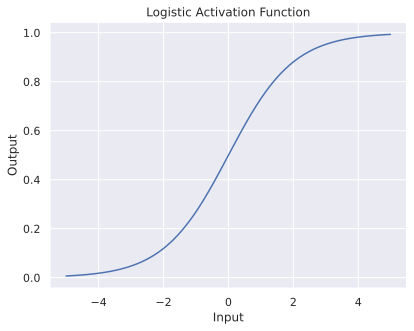

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(-5, 5, 0.01)
y = 1 / (1 + np.exp(-x))
plt.plot(x,y)
plt.title('Logistic Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')

# Hyperbolic Tangent
The hyperbolic tangent activation function (also known as “$tanh$”) looks like:

Text(0, 0.5, 'Output')

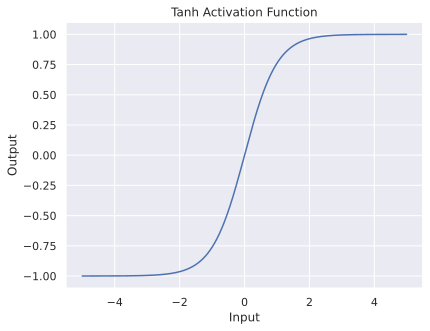

In [ ]:
x = np.arange(-5, 5, 0.01)
y = (2 / (1 + np.exp(-2*x)))-1
plt.plot(x,y)
plt.title('Tanh Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')

# Rectified Linear Unit

Text(0, 0.5, 'Output')

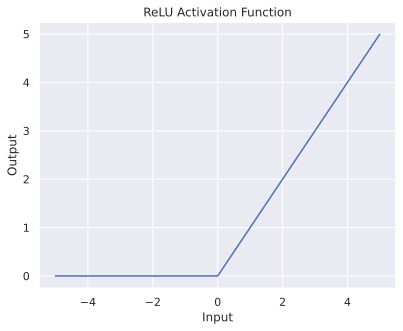

In [ ]:
x = np.arange(-5, 5, 0.01)
z = np.zeros(len(x))
y = np.maximum(z,x)
plt.plot(x,y)
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')

# Softplus

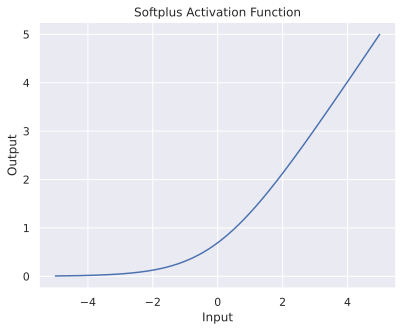

In [ ]:
x = np.arange(-5, 5, 0.01)
y = np.log(1+np.exp(x))
plt.plot(x,y)
plt.title('Softplus Activation Function')
plt.xlabel('Input')
plt.ylabel('Output');

In [ ]:
class ActivationFunction(nn.Module):
    def __init__(self):
        super().__init__()
        self.config = {}  # Ensure every activation function has a config

    def forward(self, x):
        raise NotImplementedError

class Sigmoid(ActivationFunction):
    def __init__(self):
        super().__init__()
        self.config["name"] = "sigmoid"

    def forward(self, x):
        return torch.sigmoid(x)

class Tanh(ActivationFunction):
    def __init__(self):
        super().__init__()
        self.config["name"] = "tanh"

    def forward(self, x):
        return torch.tanh(x)

class ReLU(ActivationFunction):
    def __init__(self):
        super().__init__()
        self.config["name"] = "relu"

    def forward(self, x):
        return x * (x > 0).float()

class LeakyReLU(ActivationFunction):
    def __init__(self, alpha=0.1):
        super().__init__()
        self.config["name"] = "leakyrelu"
        self.config["alpha"] = alpha
        self.alpha = alpha

    def forward(self, x):
        return torch.where(x > 0, x, self.alpha * x)

class ELU(ActivationFunction):
    def __init__(self):
        super().__init__()
        self.config["name"] = "elu"

    def forward(self, x):
        return torch.where(x > 0, x, torch.exp(x) - 1)

class Swish(ActivationFunction):
    def __init__(self):
        super().__init__()
        self.config["name"] = "swish"

    def forward(self, x):
        return x * torch.sigmoid(x)


In [ ]:
act_fn_by_name = {
    "sigmoid": Sigmoid,
    "tanh": Tanh,
    "relu": ReLU,
    "leakyrelu": LeakyReLU,
    "elu": ELU,
    "swish": Swish
}

# Ensure instances are created
act_fns = [act_fn() for act_fn in act_fn_by_name.values()]

In [ ]:
def get_grads(act_fn, x):
    x = x.clone().detach().requires_grad_(True)  # Ensure gradients can be computed
    out = act_fn(x)
    if out is None:
        raise ValueError(f"{act_fn} returned None, check forward method")
    out.sum().backward()  # Compute gradients
    return x.grad

# Visualize the activation functions including their gradients

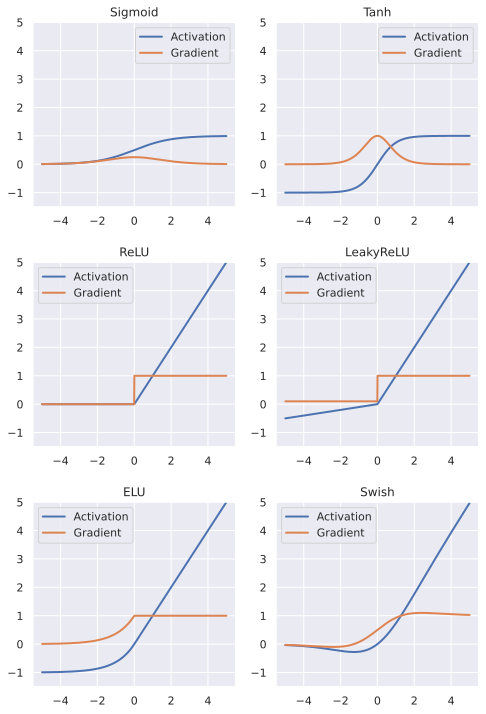

In [ ]:
def vis_act_fn(act_fn, ax, x):
    act_fn.name = act_fn.__class__.__name__  # Assign class name as title
    y = act_fn(x)
    y_grads = get_grads(act_fn, x)
    x, y, y_grads = x.cpu().detach().numpy(), y.cpu().detach().numpy(), y_grads.cpu().detach().numpy()

    ax.plot(x, y, linewidth=2, label="Activation")
    ax.plot(x, y_grads, linewidth=2, label="Gradient")
    ax.set_title(act_fn.name)
    ax.legend()
    ax.set_ylim(-1.5, x.max())


rows = math.ceil(len(act_fns) / 2)
fig, axes = plt.subplots(rows, 2, figsize=(8, rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

x = torch.linspace(-5, 5, 1000)  # Input range

for i, act_fn in enumerate(act_fns):
    vis_act_fn(act_fn, axes[i], x)

fig.subplots_adjust(hspace=0.3)
plt.show()

# Analysing the effect of activation functions

In [ ]:
class BaseNetwork(nn.Module):

    def __init__(self, act_fn, input_size=784, num_classes=10, hidden_sizes=[512, 256, 256, 128]):
        """
        Inputs:
            act_fn - Object of the activation function that should be used as non-linearity in the network.
            input_size - Size of the input images in pixels
            num_classes - Number of classes we want to predict
            hidden_sizes - A list of integers specifying the hidden layer sizes in the NN
        """
        super().__init__()

        # Create the network based on the specified hidden sizes
        layers = []
        layer_sizes = [input_size] + hidden_sizes
        for layer_index in range(1, len(layer_sizes)):
            layers += [nn.Linear(layer_sizes[layer_index-1], layer_sizes[layer_index]),
                       act_fn]
        layers += [nn.Linear(layer_sizes[-1], num_classes)]
        self.layers = nn.Sequential(*layers) # nn.Sequential summarizes a list of modules into a single module, applying them in sequence

        # We store all hyperparameters in a dictionary for saving and loading of the model
        self.config = {"act_fn": act_fn.config, "input_size": input_size, "num_classes": num_classes, "hidden_sizes": hidden_sizes}

    def forward(self, x):
        x = x.view(x.size(0), -1) # Reshape images to a flat vector
        out = self.layers(x)
        return out

In [ ]:
import torchvision
from torchvision.datasets import FashionMNIST
from torchvision import transforms

# Transformations applied on each image => first make them a tensor, then normalize them in the range -1 to 1
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Loading the training dataset. We need to split it into a training and validation part
train_dataset = FashionMNIST(root=DATASET_PATH, train=True, transform=transform, download=True)
train_set, val_set = torch.utils.data.random_split(train_dataset, [50000, 10000])

# Loading the test set
test_set = FashionMNIST(root=DATASET_PATH, train=False, transform=transform, download=True)

# We define a set of data loaders that we can use for various purposes later.
# Note that for actually training a model, we will use different data loaders
# with a lower batch size.
train_loader = data.DataLoader(train_set, batch_size=1024, shuffle=True, drop_last=False)
val_loader = data.DataLoader(val_set, batch_size=1024, shuffle=False, drop_last=False)
test_loader = data.DataLoader(test_set, batch_size=1024, shuffle=False, drop_last=False)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.6MB/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 295kB/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.54MB/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 30.7MB/s]


Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



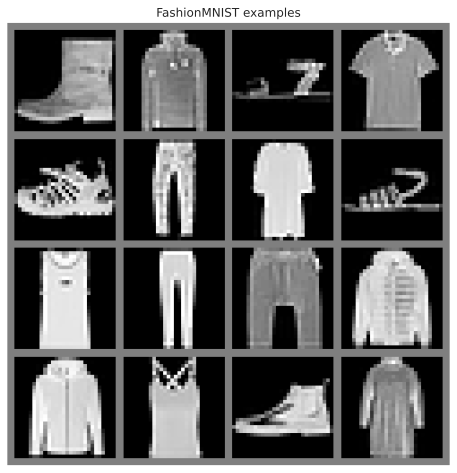

In [ ]:
exmp_imgs = [train_set[i][0] for i in range(16)]
# Organize the images into a grid for nicer visualization
img_grid = torchvision.utils.make_grid(torch.stack(exmp_imgs, dim=0), nrow=4, normalize=True, pad_value=0.5)
img_grid = img_grid.permute(1, 2, 0)

plt.figure(figsize=(8,8))
plt.title("FashionMNIST examples")
plt.imshow(img_grid)
plt.axis('off')
plt.show()
plt.close()

# Visualizing the gradient flow after initialization

In [ ]:
def visualize_gradients(net, color="C0"):
    """
    Inputs:
        net - Object of class BaseNetwork
        color - Color in which we want to visualize the histogram (for easier separation of activation functions)
    """
    net.eval()
    small_loader = data.DataLoader(train_set, batch_size=256, shuffle=False)
    imgs, labels = next(iter(small_loader))
    imgs, labels = imgs.to(device), labels.to(device)

    # Pass one batch through the network, and calculate the gradients for the weights
    net.zero_grad()
    preds = net(imgs)
    loss = F.cross_entropy(preds, labels)
    loss.backward()
    # We limit our visualization to the weight parameters and exclude the bias to reduce the number of plots
    grads = {name: params.grad.data.view(-1).cpu().clone().numpy() for name, params in net.named_parameters() if "weight" in name}
    net.zero_grad()

    ## Plotting
    columns = len(grads)
    fig, ax = plt.subplots(1, columns, figsize=(columns*3.5, 2.5))
    fig_index = 0
    for key in grads:
        key_ax = ax[fig_index%columns]
        sns.histplot(data=grads[key], bins=30, ax=key_ax, color=color, kde=True)
        key_ax.set_title(str(key))
        key_ax.set_xlabel("Grad magnitude")
        fig_index += 1
    fig.suptitle(f"Gradient magnitude distribution for activation function {net.config['act_fn']['name']}", fontsize=14, y=1.05)
    fig.subplots_adjust(wspace=0.45)
    plt.show()
    plt.close()

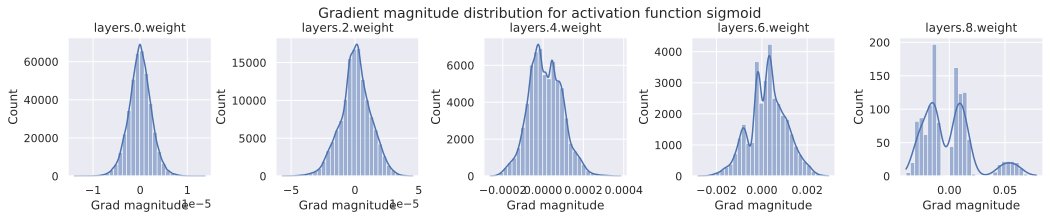

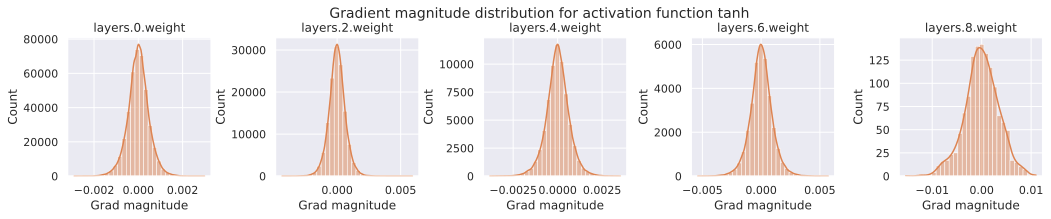

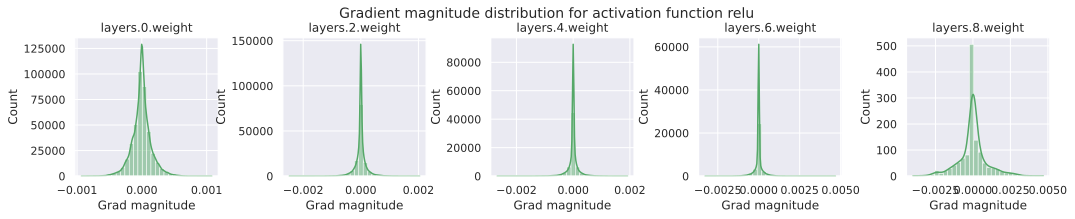

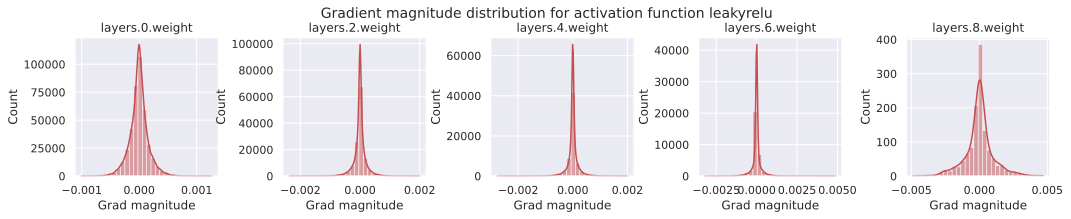

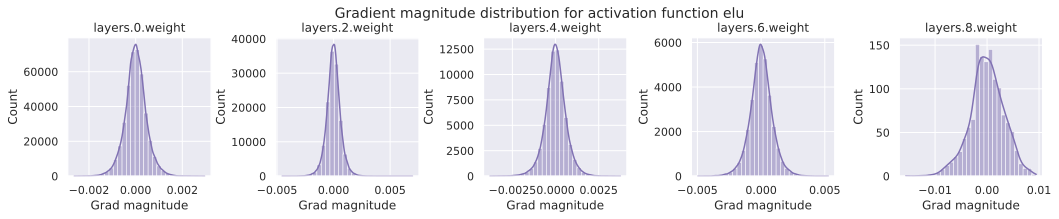

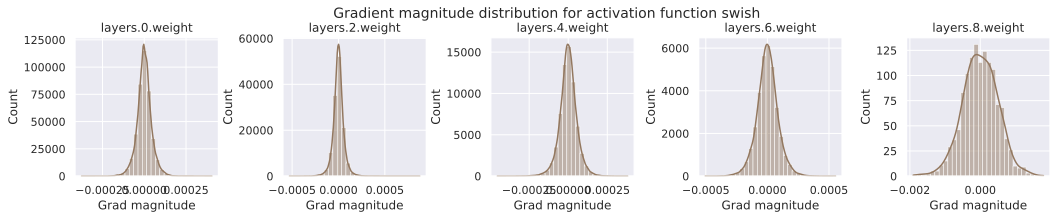

In [ ]:
# Seaborn prints warnings if histogram has small values. We can ignore them for now
import warnings
warnings.filterwarnings('ignore')
## Create a plot for every activation function
for i, act_fn_name in enumerate(act_fn_by_name):
    set_seed(42) # Setting the seed ensures that we have the same weight initialization for each activation function
    act_fn = act_fn_by_name[act_fn_name]()
    net_actfn = BaseNetwork(act_fn=act_fn).to(device)
    visualize_gradients(net_actfn, color=f"C{i}")

# Training

In [ ]:
def _get_config_file(model_path, model_name):
    # Name of the file for storing hyperparameter details
    return os.path.join(model_path, model_name + ".config")

def _get_model_file(model_path, model_name):
    # Name of the file for storing network parameters
    return os.path.join(model_path, model_name + ".tar")

def load_model(model_path, model_name, net=None):
    """
    Loads a saved model from disk.

    Inputs:
        model_path - Path of the checkpoint directory
        model_name - Name of the model (str)
        net - (Optional) If given, the state dict is loaded into this model. Otherwise, a new model is created.
    """
    config_file, model_file = _get_config_file(model_path, model_name), _get_model_file(model_path, model_name)
    assert os.path.isfile(config_file), f"Could not find the config file \"{config_file}\". Are you sure this is the correct path and you have your model config stored here?"
    assert os.path.isfile(model_file), f"Could not find the model file \"{model_file}\". Are you sure this is the correct path and you have your model stored here?"
    with open(config_file, "r") as f:
        config_dict = json.load(f)
    if net is None:
        act_fn_name = config_dict["act_fn"].pop("name").lower()
        act_fn = act_fn_by_name[act_fn_name](**config_dict.pop("act_fn"))
        net = BaseNetwork(act_fn=act_fn, **config_dict)
    net.load_state_dict(torch.load(model_file, map_location=device))
    return net

def save_model(model, model_path, model_name):
    """
    Given a model, we save the state_dict and hyperparameters.

    Inputs:
        model - Network object to save parameters from
        model_path - Path of the checkpoint directory
        model_name - Name of the model (str)
    """
    config_dict = model.config
    os.makedirs(model_path, exist_ok=True)
    config_file, model_file = _get_config_file(model_path, model_name), _get_model_file(model_path, model_name)
    with open(config_file, "w") as f:
        json.dump(config_dict, f)
    torch.save(model.state_dict(), model_file)

In [ ]:
def train_model(net, model_name, max_epochs=50, patience=7, batch_size=256, overwrite=False):
    """
    Train a model on the training set of FashionMNIST

    Inputs:
        net - Object of BaseNetwork
        model_name - (str) Name of the model, used for creating the checkpoint names
        max_epochs - Number of epochs we want to (maximally) train for
        patience - If the performance on the validation set has not improved for #patience epochs, we stop training early
        batch_size - Size of batches used in training
        overwrite - Determines how to handle the case when there already exists a checkpoint. If True, it will be overwritten. Otherwise, we skip training.
    """
    file_exists = os.path.isfile(_get_model_file(CHECKPOINT_PATH, model_name))
    if file_exists and not overwrite:
        print("Model file already exists. Skipping training...")
    else:
        if file_exists:
            print("Model file exists, but will be overwritten...")

        # Defining optimizer, loss and data loader
        optimizer = optim.SGD(net.parameters(), lr=1e-2, momentum=0.9) # Default parameters, feel free to change
        loss_module = nn.CrossEntropyLoss()
        train_loader_local = data.DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True, pin_memory=True)

        val_scores = []
        best_val_epoch = -1
        for epoch in range(max_epochs):
            ############
            # Training #
            ############
            net.train()
            true_preds, count = 0., 0
            for imgs, labels in tqdm(train_loader_local, desc=f"Epoch {epoch+1}", leave=False):
                imgs, labels = imgs.to(device), labels.to(device) # To GPU
                optimizer.zero_grad() # Zero-grad can be placed anywhere before "loss.backward()"
                preds = net(imgs)
                loss = loss_module(preds, labels)
                loss.backward()
                optimizer.step()
                # Record statistics during training
                true_preds += (preds.argmax(dim=-1) == labels).sum()
                count += labels.shape[0]
            train_acc = true_preds / count

            ##############
            # Validation #
            ##############
            val_acc = test_model(net, val_loader)
            val_scores.append(val_acc)
            print(f"[Epoch {epoch+1:2d}] Training accuracy: {train_acc*100.0:05.2f}%, Validation accuracy: {val_acc*100.0:05.2f}%")

            if len(val_scores) == 1 or val_acc > val_scores[best_val_epoch]:
                print("\t   (New best performance, saving model...)")
                #save_model(net, CHECKPOINT_PATH, model_name)
                best_val_epoch = epoch
            elif best_val_epoch <= epoch - patience:
                print(f"Early stopping due to no improvement over the last {patience} epochs")
                break

        # Plot a curve of the validation accuracy
        plt.plot([i for i in range(1,len(val_scores)+1)], val_scores)
        plt.xlabel("Epochs")
        plt.ylabel("Validation accuracy")
        plt.title(f"Validation performance of {model_name}")
        plt.show()
        plt.close()

    #load_model(CHECKPOINT_PATH, model_name, net=net)
    test_acc = test_model(net, test_loader)
    print((f" Test accuracy: {test_acc*100.0:4.2f}% ").center(50, "=")+"\n")
    return test_acc


def test_model(net, data_loader):
    """
    Test a model on a specified dataset.

    Inputs:
        net - Trained model of type BaseNetwork
        data_loader - DataLoader object of the dataset to test on (validation or test)
    """
    net.eval()
    true_preds, count = 0., 0
    for imgs, labels in data_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        with torch.no_grad():
            preds = net(imgs).argmax(dim=-1)
            true_preds += (preds == labels).sum().item()
            count += labels.shape[0]
    test_acc = true_preds / count
    return test_acc

In [ ]:
for act_fn_name in act_fn_by_name:
    print(f"Training BaseNetwork with {act_fn_name} activation...")
    set_seed(42)
    act_fn = act_fn_by_name[act_fn_name]()
    net_actfn = BaseNetwork(act_fn=act_fn).to(device)
    train_model(net_actfn, f"FashionMNIST_{act_fn_name}", overwrite=False)

Training BaseNetwork with sigmoid activation...
Model file already exists. Skipping training...
============= Test accuracy: 10.00% ==============

Training BaseNetwork with tanh activation...
Model file already exists. Skipping training...
============= Test accuracy: 87.59% ==============

Training BaseNetwork with relu activation...
Model file already exists. Skipping training...
============= Test accuracy: 88.62% ==============

Training BaseNetwork with leakyrelu activation...
Model file already exists. Skipping training...
============= Test accuracy: 88.92% ==============

Training BaseNetwork with elu activation...
Model file already exists. Skipping training...
============= Test accuracy: 87.27% ==============

Training BaseNetwork with swish activation...
Model file already exists. Skipping training...
============= Test accuracy: 88.73% ==============



# Practice Questions for Activation Functions:
1. Implement and visualize the gradients of different activation functions.
2. Compare the performance of ReLU, Sigmoid, and Tanh in a deep neural network.
3. Modify the LeakyReLU function and analyze its impact on training stability.